In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import csv

# Chromatogramme de l'échantillon 1

In [2]:
file = "Chromatos/tic_front_ech_1_hydro.csv"
ech_1_hydro_df = pd.read_csv(file, skiprows=1)
ech_1_hydro_df

,Start of data points,Area
0,1.99480,6938978.0
1,1.99862,6158481.0
2,2.00242,5366951.0
3,2.00623,4755161.0
4,2.01005,4345257.0
...,...,...
8344,33.80745,427167.0
8345,33.81127,428047.0
8346,33.81507,427393.0
8347,33.81888,427451.0


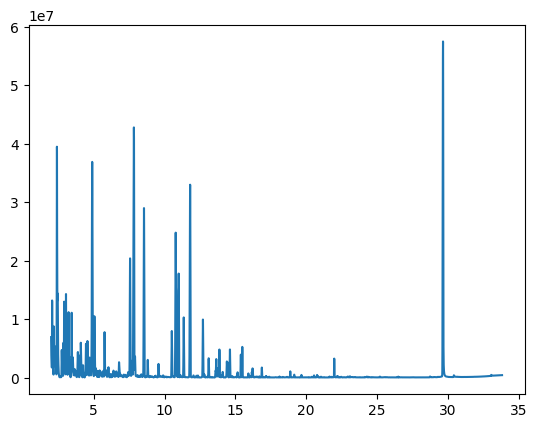

In [3]:
plt.plot(ech_1_hydro_df['Start of data points'], ech_1_hydro_df['Area'])

Note : J'ai récupéré tous les chromatogrammes normalement! Essayer de voir comment les séparer.

# Ensemble des chromatogrammes

J'ai dû faire en deux fois à voir si ça marche ou pas...

In [28]:
with open('Chromatos/CHROMTAB.CSV') as csvfile :
    reader = csv.reader(csvfile)
    k = 0
    csv_files = []
    
    for i, row in enumerate(reader) :
        if row[0] == 'Path':
            if i != 0 :
                csv_files.append(csv_file)
            csv_file = []
            k = i
            
        elif i == k+1 :
            name = row[1].strip('.D')
            csv_file.append(name)
            print(name)
        
        else :
            print(row)
            if i != k+2 :
                print(row[0], csv_file)
                csv_file.append({'Retention time' : row[0], 'Abundance' : row[1]})

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 4808: invalid continuation byte

In [27]:
csv_files

[]

In [20]:
for csv_file in csv_files :
    with open(f'Chromatos/{csv_file[0]}.csv', 'w') as csvfile :
        writer = csv.DictWriter(csvfile, fieldnames=csv_file[1].keys())
        writer.writeheader()
        for point in csv_file[1:]:
              writer.writerow(point)